In [1]:
import pandas as pd
from matplotlib import pyplot as plots
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
import numpy as np
%matplotlib inline

2022-09-23 15:19:51.766451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_frame_bank_churn_modelling = pd.read_csv("data/Churn_Modelling.csv")
data_frame_bank_churn_modelling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data_frame_bank_churn_modelling.drop('CustomerId',axis='columns',inplace=True)
data_frame_bank_churn_modelling.drop('RowNumber',axis='columns',inplace=True)
data_frame_bank_churn_modelling.drop('Surname',axis='columns',inplace=True)


In [4]:
data_frame_bank_churn_modelling.isnull().values.any()

False

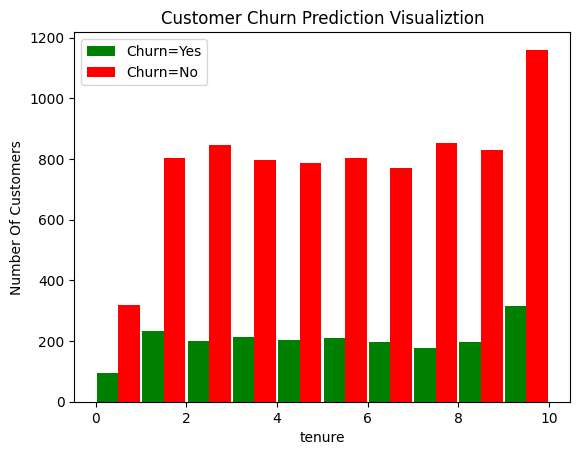

In [5]:
number_of_years_account_holder_stayed = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==0].Tenure
number_of_years_account_holder_completed = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==1].Tenure

plots.xlabel("tenure")
plots.ylabel("Number Of Customers")
plots.title("Customer Churn Prediction Visualiztion")

plots.hist([number_of_years_account_holder_completed, number_of_years_account_holder_stayed], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plots.legend()

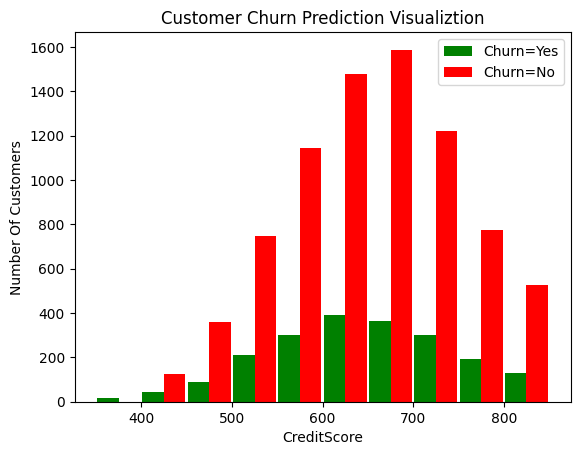

In [6]:
creditscore_account_holder_lived = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==0].CreditScore
creditscore_account_holder_continuing = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==1].CreditScore

plots.xlabel("CreditScore")
plots.ylabel("Number Of Customers")
plots.title("Customer Churn Prediction Visualiztion")

plots.hist([creditscore_account_holder_continuing, creditscore_account_holder_lived], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plots.legend()

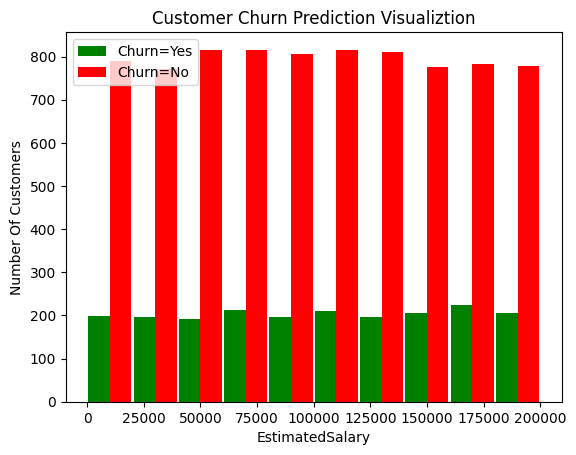

In [7]:
estimated_salary_account_holder_lived = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==0].EstimatedSalary	
estimated_salary_account_holder_continuing = data_frame_bank_churn_modelling[data_frame_bank_churn_modelling.Exited==1].EstimatedSalary	

plots.xlabel("EstimatedSalary")
plots.ylabel("Number Of Customers")
plots.title("Customer Churn Prediction Visualiztion")

plots.hist([estimated_salary_account_holder_continuing, estimated_salary_account_holder_lived], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plots.legend()

In [8]:
def print_unique_col_values(data_frame_bank_churn_modelling):
       for column in data_frame_bank_churn_modelling:
            if data_frame_bank_churn_modelling[column].dtypes=='object':
                print(f'{column}: {data_frame_bank_churn_modelling[column].unique()}') 

In [9]:
print_unique_col_values(data_frame_bank_churn_modelling)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
data_frame_bank_churn_modelling['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [11]:
data_frame_bank_churn_modelling.Gender.unique()

array([1, 0])

In [12]:
data_frame_bank_churn_modelling = pd.get_dummies(data=data_frame_bank_churn_modelling, columns=['Geography'])
data_frame_bank_churn_modelling.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
data_frame_bank_churn_modelling.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [14]:
data_frame_bank_churn_modelling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [15]:
col_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

scaler = MinMaxScaler()

data_frame_bank_churn_modelling[col_to_scale]=scaler.fit_transform(data_frame_bank_churn_modelling[col_to_scale])
data_frame_bank_churn_modelling

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,2,1,0,0.464429,1,0,1,0


In [16]:
bank_churn_modelling_feature = data_frame_bank_churn_modelling.drop('Exited',axis='columns')
bank_churn_modelling_labels = data_frame_bank_churn_modelling['Exited']

bank_churn_modelling_feature,bank_churn_modelling_labels

(      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
 0           0.538       1  0.324324     0.2  0.000000              1   
 1           0.516       1  0.310811     0.1  0.334031              1   
 2           0.304       1  0.324324     0.8  0.636357              3   
 3           0.698       1  0.283784     0.1  0.000000              2   
 4           1.000       1  0.337838     0.2  0.500246              1   
 ...           ...     ...       ...     ...       ...            ...   
 9995        0.842       0  0.283784     0.5  0.000000              2   
 9996        0.332       0  0.229730     1.0  0.228657              1   
 9997        0.718       1  0.243243     0.7  0.000000              1   
 9998        0.844       0  0.324324     0.3  0.299226              2   
 9999        0.884       1  0.135135     0.4  0.518708              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
 0             1               1         0.506735  

In [17]:
bank_churn_modelling_feature_train, bank_churn_modelling_feature_test, bank_churn_modelling_labels_train, bank_churn_modelling_labels_test = train_test_split(bank_churn_modelling_feature,bank_churn_modelling_labels,test_size=0.2,random_state=5)

bank_churn_modelling_feature_train.shape, bank_churn_modelling_feature_test.shape, bank_churn_modelling_labels_train.shape, bank_churn_modelling_labels_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [18]:
len(bank_churn_modelling_feature_train.columns)

12

In [19]:

nural_network_model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nural_network_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

nural_network_model.fit(bank_churn_modelling_feature_train, bank_churn_modelling_labels_train, epochs=100)

2022-09-23 15:20:01.514353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5710 - accuracy: 0.7911
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4675 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8040
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8269
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8344
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3827 - accuracy: 0.8372
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3774 - accuracy: 0.8406
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8435
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3707 - accuracy: 0.8462
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3665 - accura

In [20]:
nural_network_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________


In [21]:
nural_network_model.evaluate(bank_churn_modelling_feature_test, bank_churn_modelling_labels_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8545


[0.3473398685455322, 0.8544999957084656]

In [22]:
yp=nural_network_model.predict(bank_churn_modelling_feature_test)

63/63 [==============================] - 1s 5ms/step


In [24]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
print(classification_report( bank_churn_modelling_labels_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.49      0.58       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

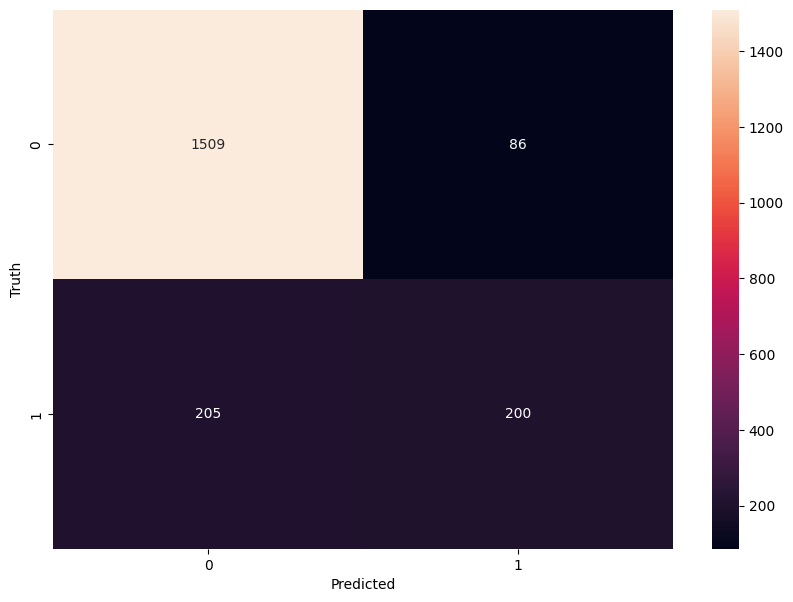

In [27]:
cm = tf.math.confusion_matrix(labels= bank_churn_modelling_labels_test,predictions=y_pred)

plots.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plots.xlabel('Predicted')
plots.ylabel('Truth')

In [28]:
model = LogisticRegression()
model.fit(bank_churn_modelling_feature_train, bank_churn_modelling_labels_train)
y=model.predict(bank_churn_modelling_feature_test)
y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
print(classification_report(bank_churn_modelling_labels_test ,y))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.57      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



Text(95.72222222222221, 0.5, 'Truth')

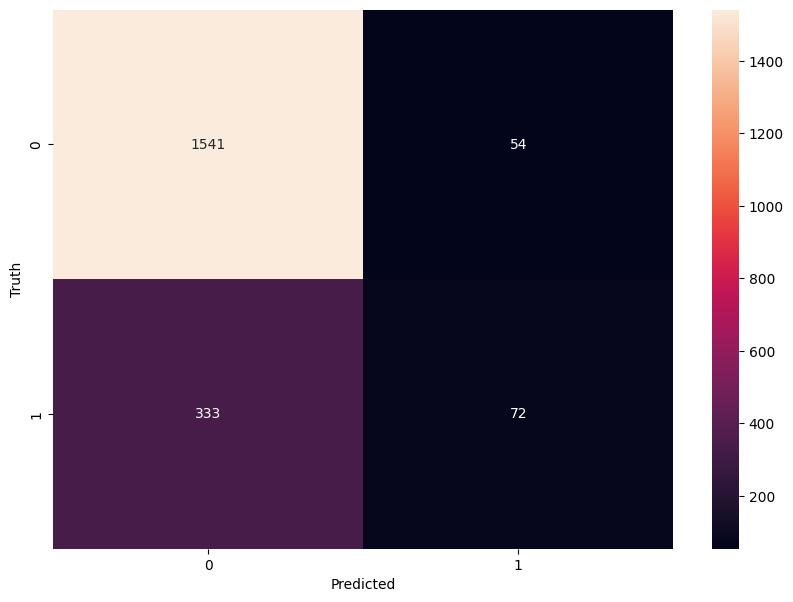

In [31]:
cm = tf.math.confusion_matrix(labels=bank_churn_modelling_labels_test ,predictions=y)

plots.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plots.xlabel('Predicted')
plots.ylabel('Truth')